<div style="text-align: center;">
<figure>
<img src="Cover.jpg" alt="Effervescent Tablet" width="50%">
<p style="text-align: center;">Image source: <a href="https://www.facebook.com/people/Lyukas%C3%B3ra-foly%C3%B3irat-Magyar-%C3%8Dr%C3%B3k-Egyes%C3%BClete/100063858527772/">Lyukasóra folyóirat</a> (see also <a href="http://www.lyukasora.net/">here</a>)</p>
</figure>
</div>

# Natural Poetry Processing

[**Jozsef Konczer**](https://konczer.github.io/)

[*Computational Thinking With Python*](https://github.com/Konczer/ComputationalThinkingWithPython)

@ [Engame Academy ](https://engame.hu/en/)

## Questions:

* How well can a Machine Learning algorithm guess the Author of a Poem?
    * Is it relevant if the poem is written in English or in a low resource (e.g. Hungarian) language?
    * Does it matter if it is a Translation?
    * How accurate this algorithm can be?
        * How can we measure its performance?
* Where can we find an appropriate database for poems?
* How to scrape it, and which features to extract?

## Definitions:

* We get our textual Corpus from a homepage, including large collection of poems and their translation to different languages:
    * [Babelmatrix](https://www.babelmatrix.org/)
* Our goal is to construct an aid for an Author guessing game "Lyukasóra" ("Free period" or "Cancelled class")
    * [Lyukasóra](https://nava.hu/talalati-lista/?q=lyukas%C3%B3ra)
    * And to investigate its performance and how it depends on various embeddings.

## Abstraction:

* First we will process all Hungarian poems, with an English translation:
    * See [Scrpaing.nb](https://github.com/Konczer/DataScienceCourse/blob/main/06_Poetry/Mathematica/Scraping.nb)
    * The scraped Poems are Exported into a file, from which the data can be Imported as JSON:
        * [huenScrapedPoems.json](https://github.com/Konczer/DataScienceCourse/blob/main/06_Poetry/Python/huenScrapedPoems.json)

## Computation:

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import json

In [2]:
with open('huenScrapedPoems.json', 'r') as f:
    data=json.load(f)

In [3]:
data[0].keys(), data[0]['original'].keys(), data[0]['translation'].keys()

(dict_keys(['original', 'translation']),
 dict_keys(['author', 'lang', 'genre', 'title', 'text']),
 dict_keys(['author', 'lang', 'genre', 'title', 'text']))

In [4]:
originals = pd.DataFrame([d['original'] for d in data])
translation = pd.DataFrame([d['translation'] for d in data])

In [6]:
originals

,author,lang,genre,title,text
0,Szép Ernő,hu,verse,1917-ben,"[Ez a kék ég vörös lehetne,, \nRajta fekete na..."
1,Faludy György,hu,verse,1940,"[Hittük, nem csak a franciák:, \növék a legjob..."
2,Vas István,hu,verse,1944 június 6,"[Zöld autó, zöld egyenruhában szőke tiszt,, S..."
3,Pilinszky János,hu,verse,1970. december 22.,"[Rühes ebek, vérzünk a párnán., Gyönyörüek va..."
4,Fodor Ákos,hu,verse,2x2,"[Két bánatom van:, egyik, hogy meg kell halno..."
...,...,...,...,...,...
12053,Orbán Ottó,hu,verse,Zsoltár,"[Szép vagy, én szerelmesem, szép, ahogy feksze..."
12054,Baka István,hu,verse,Zsoltár,"[Nem kértelek s nem kérnélek ma sem, Oly félsz..."
12055,Pilinszky János,hu,verse,Zsoltár,"[Aki több napos éhezés után, \nkenyérre gondol..."
12056,Kosztolányi Dezső,hu,verse,Zsuzsika,"[Zsuzsika,, \nálmomba láttalak., \n , \nVilágo..."


In [7]:
translation

,author,lang,genre,title,text
0,"Mulzet, Ottilie",en,verse,1917,"[This blue sky scarlet could be,, \nOn it blac..."
1,"Ország-Land, Thomas",en,verse,"Refugee, 1940","[Like our hosts, we thought the French army, \..."
2,"Ország-Land, Thomas",en,verse,The colours that day,"[The soldier is tanned and blond, his car and ..."
3,N. Ullrich Katalin,en,verse,"22 December, 1970","[Mangy dogs, bleeding on the pillow., We are ..."
4,N. Ullrich Katalin,en,verse,2x2,"[I have two sorrows:, one is that I must die;..."
...,...,...,...,...,...
12053,P. Zollman,en,verse,Psalm,"[You are comely, my beloved, comely as you lie..."
12054,P. Zollman,en,verse,Psalm,"[I never asked you nor would I this time, for ..."
12055,N. Ullrich Katalin,en,verse,Psalm,"[Who after several days’ starving, \nthinks of..."
12056,"Kery, Leslie A.",en,verse,Susie,"[Susie,, \nI saw you in a dream., \n , \nYou w..."


### Lyukasóra: Poet guessing Game

In [8]:
try:
    import ipywidgets as widgets
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','ipywidgets'])
    import ipywidgets as widgets

In [9]:
from IPython.display import display

def random_poem():
    # select a random peom from the database
    rnd = np.random.randint(len(originals))
    random_poem = originals.iloc[rnd]
    random_peom_text = '\n'.join(random_poem.text)
    print(random_peom_text)

    # display a button, which reveals the author
    button = widgets.Button(description="Show the Author")
    output = widgets.Output()

    display(button, output)

    def on_button_clicked(b):
        with output:
            print(random_poem['author'])

    button.on_click(on_button_clicked)
    

In [14]:
random_poem()

Megkaptad végűl a kegyelmet?


Vagy olyan egyedűl maradtál,


mint az a férfi, aki tegnap -


vagy az a fiú, aki ma -


egyszóval, mint azok a lények,


akik számára a világ


már semmi más, mint tárgyi bizonyíték?


Button(description='Show the Author', style=ButtonStyle())

Output()

### Classifier:

In [22]:
# ! pip install scikit-learn
# ! pip install networkx

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from matplotlib import pyplot as plt
import networkx as nx

We will use the [Multi-layer Perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) from [scikit-learn](https://scikit-learn.org/) package.

In [24]:
# Splitting the database entries to poem texts and authors

poems = originals
# poems = translation

texts = poems['text'].apply(lambda t: '\n'.join(t)).tolist()
authors = poems['author'].tolist()

We use [Bag-of-words](https://en.wikipedia.org/wiki/Bag-of-words_model) feature extraction by calling [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html):

In [25]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)
y = authors

In [26]:
# printing random feature names (words):

vectorizer.get_feature_names_out()[np.random.randint(vectorizer.get_feature_names_out().shape[0], size=10)]

array(['higgyed', 'teherkocsit', 'felállítani', 'öle', 'csigázza',
       'karján', 'leborult', 'görbedtség', 'sokaság', 'pislog'],
      dtype=object)

In [27]:
# feature size and example size check

vectorizer.get_feature_names_out().shape, X.toarray().shape

((45260,), (12058, 45260))

In [28]:
# feature extraction example:

v = vectorizer.transform(['Harminckét éves lettem én én']).toarray()
v[v > 0]

array([1, 1, 2, 1])

In [29]:
# Train-Test split (80% Test, and only 20% Train)

(
    X_train,
    X_test,
    y_train,
    y_test,
    indices_train,
    indices_test,
) = train_test_split(X, y, range(X.shape[0]), test_size=0.8)

In [36]:
# Model training:

clf = MLPClassifier(verbose=True)
clf.fit(X_train, y_train)

Iteration 1, loss = 4.70661378
Iteration 2, loss = 3.27894230
Iteration 3, loss = 2.12722420
Iteration 4, loss = 1.39612303
Iteration 5, loss = 0.96369521
Iteration 6, loss = 0.69577936
Iteration 7, loss = 0.51597606
Iteration 8, loss = 0.38852572
Iteration 9, loss = 0.29640105
Iteration 10, loss = 0.22746479
Iteration 11, loss = 0.17350560
Iteration 12, loss = 0.13544096
Iteration 13, loss = 0.10712482
Iteration 14, loss = 0.08622644
Iteration 15, loss = 0.07076303
Iteration 16, loss = 0.05972560
Iteration 17, loss = 0.05063907
Iteration 18, loss = 0.04335340
Iteration 19, loss = 0.03757817
Iteration 20, loss = 0.03306373
Iteration 21, loss = 0.02915421
Iteration 22, loss = 0.02618880
Iteration 23, loss = 0.02374726
Iteration 24, loss = 0.02182655
Iteration 25, loss = 0.02007335
Iteration 26, loss = 0.01861214
Iteration 27, loss = 0.01724301
Iteration 28, loss = 0.01617229
Iteration 29, loss = 0.01519118
Iteration 30, loss = 0.01430009
Iteration 31, loss = 0.01357761
Iteration 32, los

MLPClassifier(verbose=True)

In [37]:
# Poet guessing game with hint from the classifier:

def random_poem_hint():
    # select a random peom from the database
    rnd = np.random.randint(len(originals))
    random_poem = originals.iloc[rnd]
    random_peom_text = '\n'.join(random_poem.text)
    print(random_peom_text)

    # display a button, which gives a hint from the Classifier
    button_hint = widgets.Button(description="Classifier's Guess")
    output_hint = widgets.Output()

    display(button_hint, output_hint)

    def on_button_clicked_hint(b):
        with output:
            print(clf.predict(vectorizer.transform([random_peom_text]))[0])

    # display a button, which reveals the author
    button = widgets.Button(description="Show the Author")
    output = widgets.Output()

    display(button, output)

    def on_button_clicked(b):
        with output:
            print(random_poem['author'])

    button.on_click(on_button_clicked)
    button_hint.on_click(on_button_clicked_hint)

In [46]:
random_poem_hint()

Egy félig csókolt csóknak a tüze


Lángol elébünk.


Hideg az este. Néha szaladunk,


Sírva szaladunk


S oda nem érünk.


 


Hányszor megállunk. Összeborulunk.


Égünk és fázunk.


Ellöksz magadtól: ajkam csupa vér,


Ajkad csupa vér.


Ma sem lesz nászunk.


 


Bevégzett csókkal lennénk szívesen


Megbékült holtak,


De kell az a csók, de hí az a tűz


S mondjuk szomorún:


Holnap. Majd holnap.


Button(description="Classifier's Guess", style=ButtonStyle())

Output()

Button(description='Show the Author', style=ButtonStyle())

Output()

### Prediction Probabilities:

In [47]:
# Guessing from the first verse:

preds = clf.predict_proba(vectorizer.transform([
"""
Mit málló kőre nem bizol:
 mintázd meg levegőből.
 Van néha olyan pillanat
 mely kilóg az időből,
"""]).toarray())

In [48]:
preds.shape

(1, 163)

<BarContainer object of 163 artists>

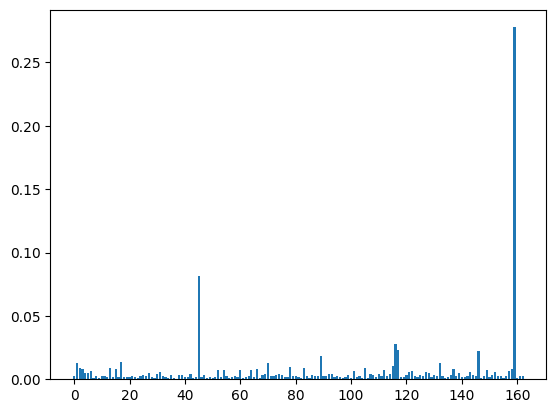

In [50]:
plt.bar(range(len(preds[0])),preds[0])

<BarContainer object of 163 artists>

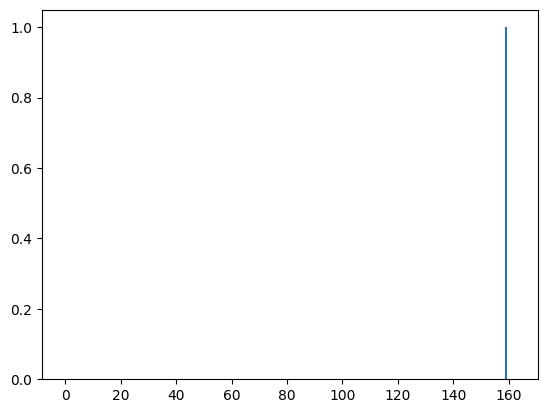

In [51]:
# Guessin from the whole poem:

preds = clf.predict_proba(vectorizer.transform([
"""
Mit málló kőre nem bizol:
 mintázd meg levegőből.
 Van néha olyan pillanat
 mely kilóg az időből,


mit kő nem óv, megőrzi ő,
 bezárva kincses öklét,
 jövője nincs és multja sincs,
 ő maga az öröklét.


Mint fürdőző combját ha hal
 súrolta s tovalibbent –
 így néha megérezheted
 önnön-magadban Istent:


fél-emlék a jelenben is,
 és később, mint az álom.
 S az öröklétet ízleled
 még innen a halálon.
"""]).toarray())

plt.bar(range(len(preds[0])),preds[0])

### Evaluation:

#### Confusion Matrix and Metrics:

In [52]:
y_pred = clf.predict(X_test)

In [53]:
author_set = list(set(y_test))
metrics_dict = {}
conf_mx = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred, labels=author_set)

metrics_dict["accuracy"] = metrics.accuracy_score(
    y_true=y_test, y_pred=y_pred, normalize=True, sample_weight=None
 )

metrics_dict["avg precision"] = metrics.precision_score(
    y_true=y_test, y_pred=y_pred, zero_division=0, average='macro'
)
metrics_dict["avg recall"] = metrics.recall_score(
    y_true=y_test, y_pred=y_pred, zero_division=0, average='macro'
    )

In [54]:
# Precision and Recall:

metrics_dict

{'accuracy': 0.9007981755986317,
 'avg precision': 0.972900265705865,
 'avg recall': 0.9116746051543397}

/tmp/ipykernel_689934/3476102664.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(author_set)
/tmp/ipykernel_689934/3476102664.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(author_set)


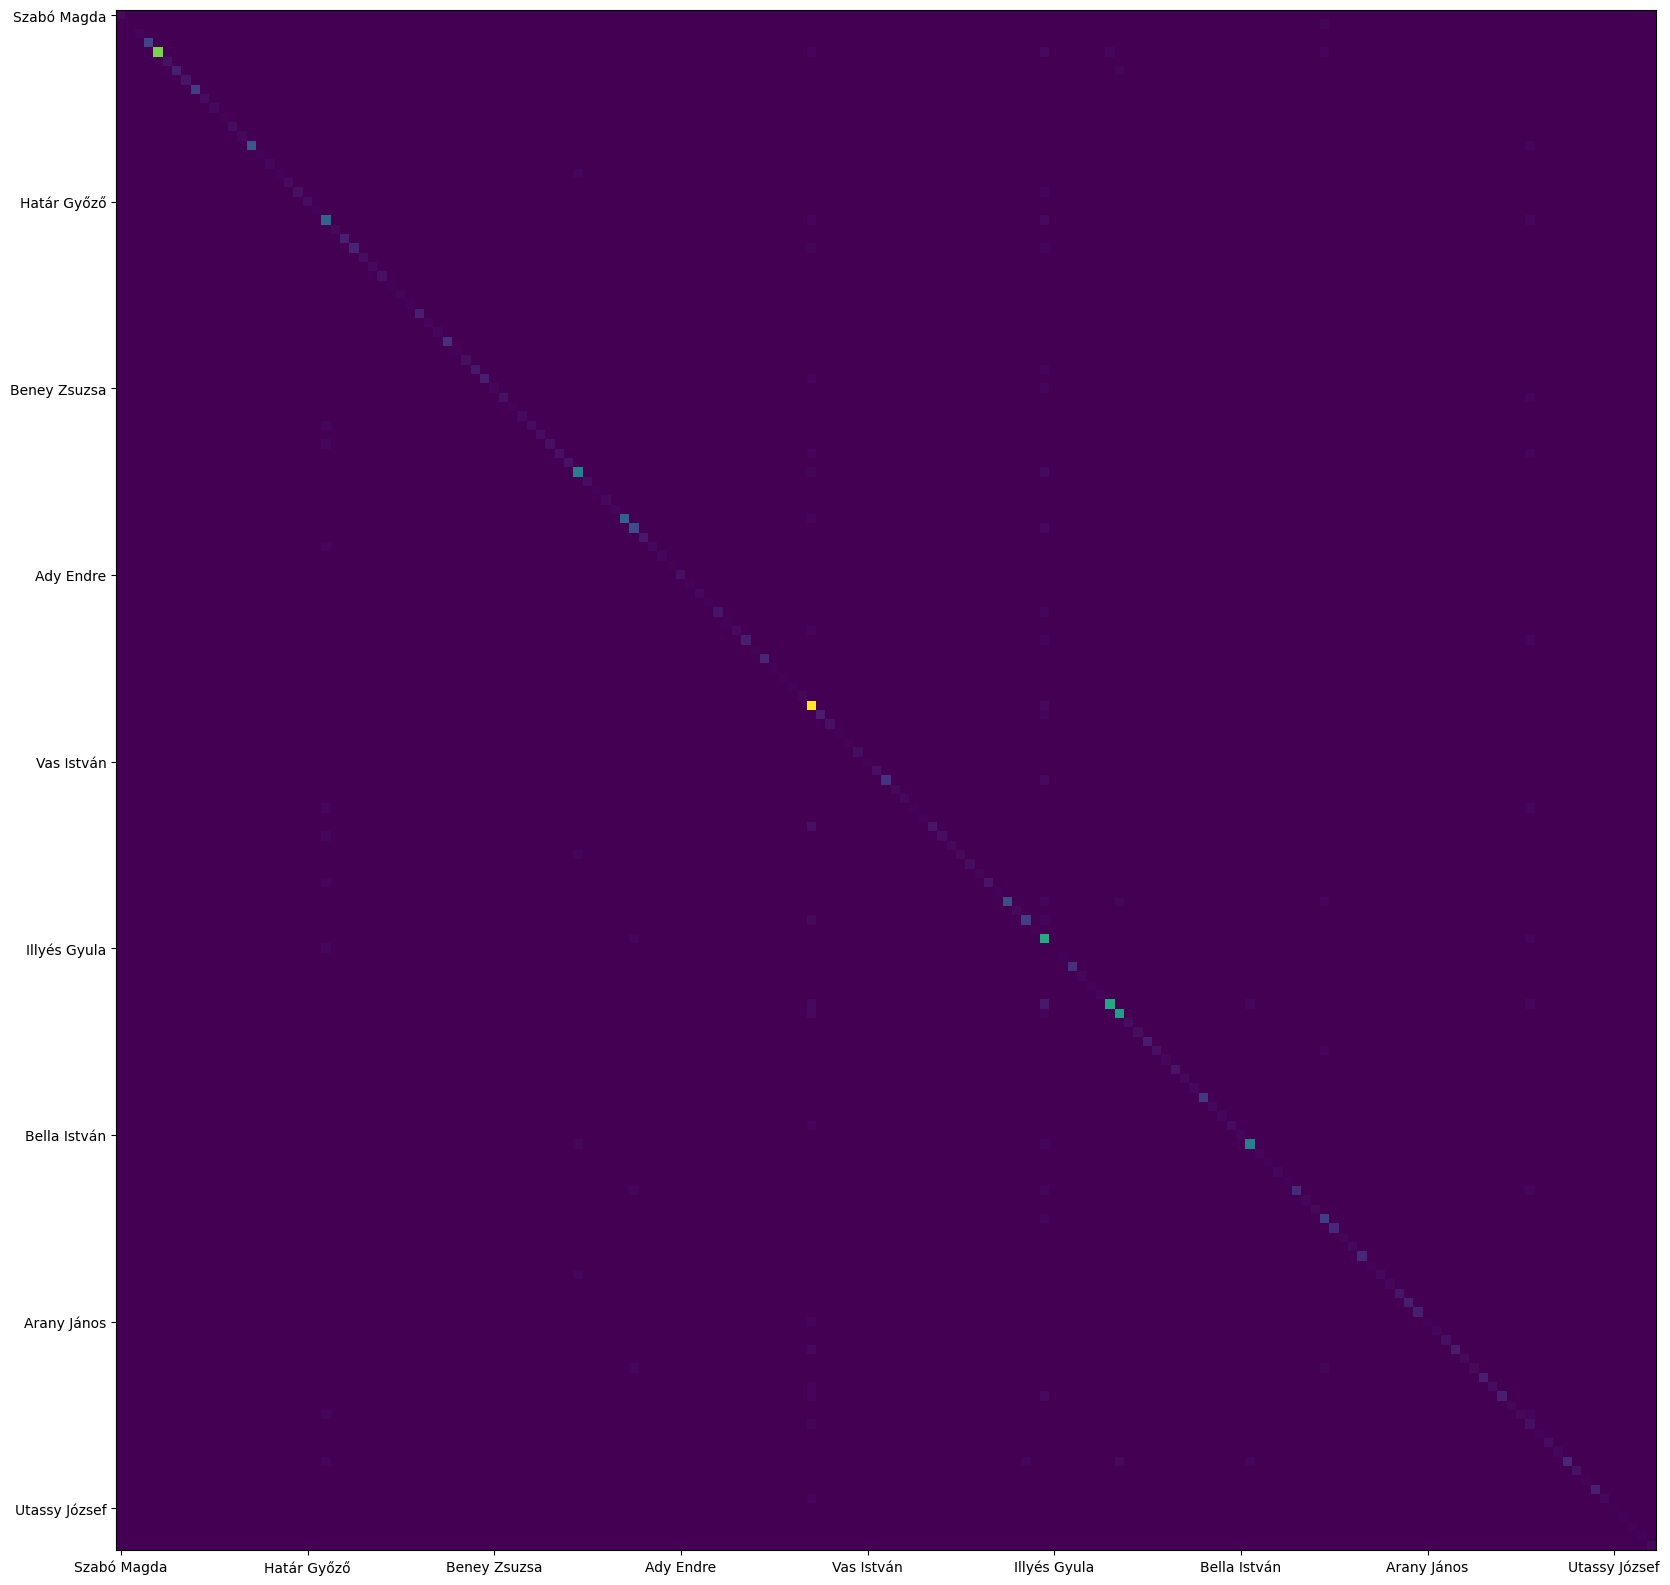

In [55]:
# Confusion Matrix:

fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
ax.set_yticklabels(author_set)
ax.set_xticklabels(author_set)
ax.imshow(conf_mx)

### Author similarity network:

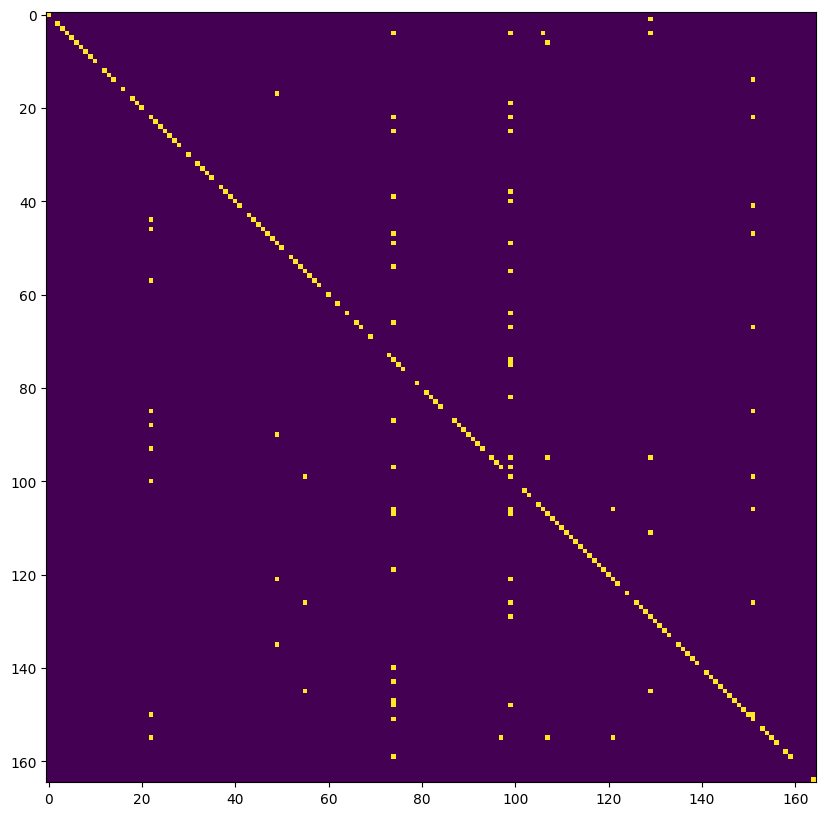

In [56]:
# By definition a confusion matrix C is such that Cij is equal to the number of observations known to be in group i and predicted to be in group j.
conf_mx_normalised = conf_mx # / np.linalg.norm(conf_mx, axis=0)

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
conf_mx_norm_binarised = (conf_mx_normalised > 8.) * 1
ax.imshow(conf_mx_norm_binarised)

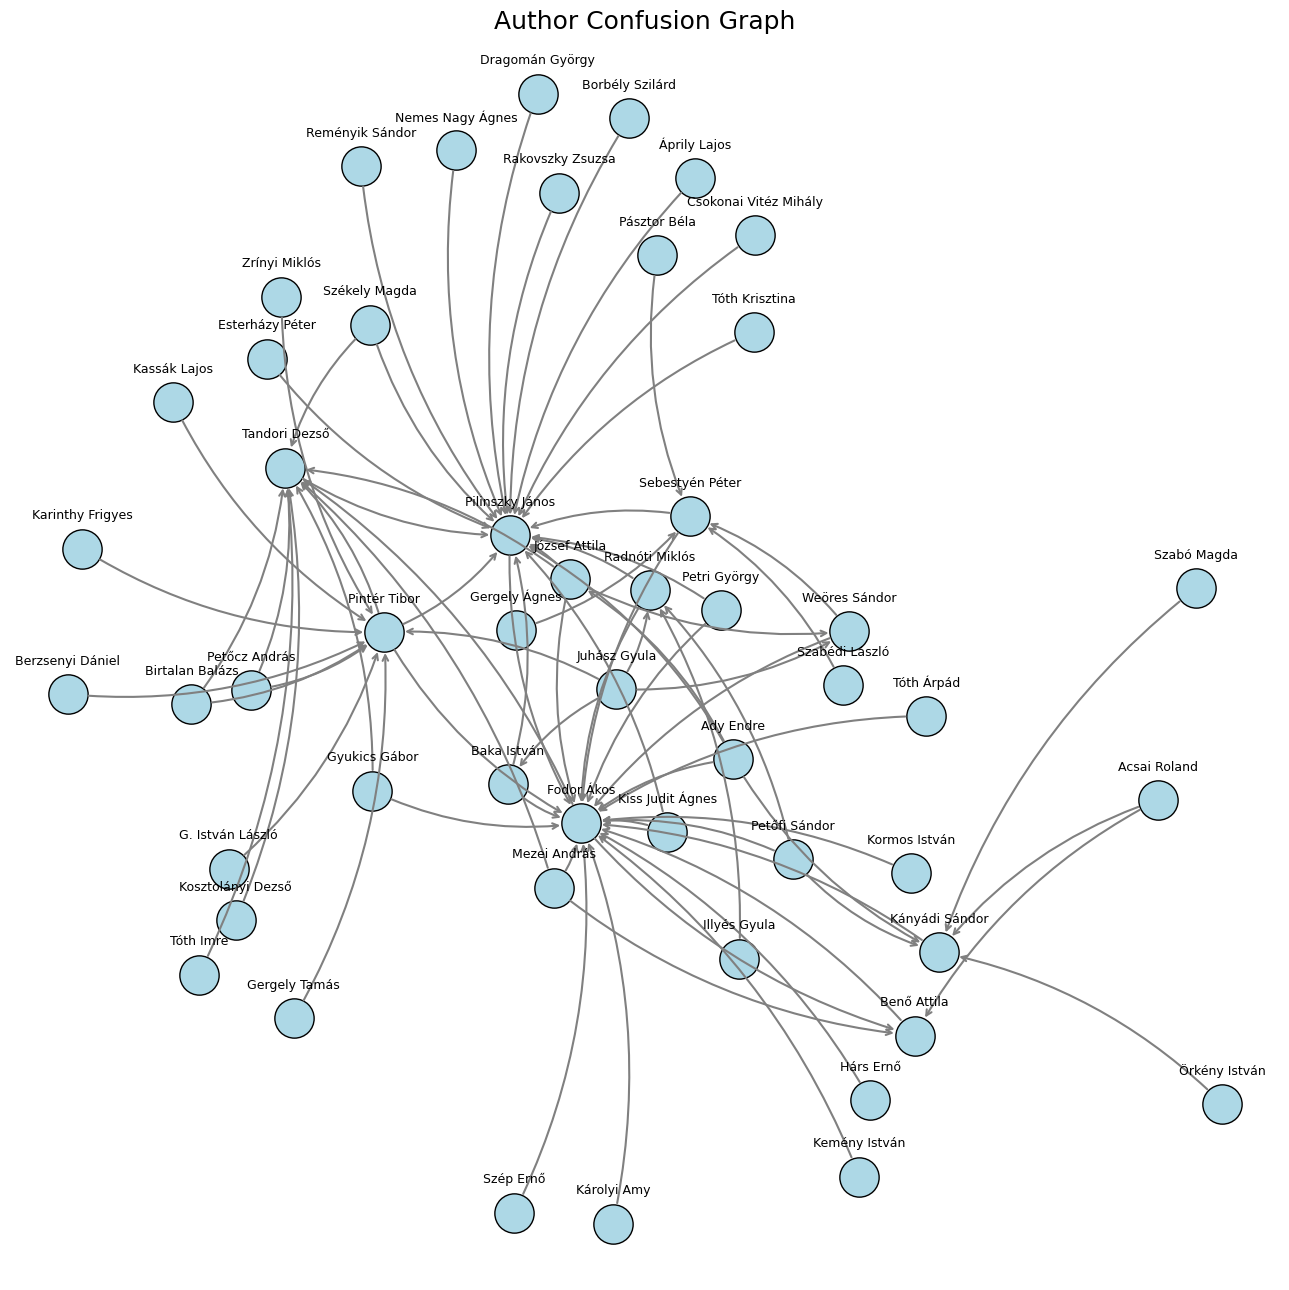

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Remove self-loops and binarize
np.fill_diagonal(conf_mx_norm_binarised, 0)
rows, cols = np.where(np.array(conf_mx_norm_binarised))
edges = list(zip(rows.tolist(), cols.tolist()))

G = nx.DiGraph()
G.add_edges_from(edges)

# Layout
pos = nx.spring_layout(G, k=0.6, iterations=100, seed=42)

# Start plotting
fig, ax = plt.subplots(figsize=(13, 13))

# Draw nodes
nx.draw_networkx_nodes(
    G, pos,
    node_color='lightblue',
    node_size=800,
    edgecolors='black',
    ax=ax
)

# --- Draw edges with visible arrows manually ---
for source, target in G.edges():
    src = pos[source]
    tgt = pos[target]

    ax.annotate("",
        xy=tgt, xycoords='data',
        xytext=src, textcoords='data',
        arrowprops=dict(
            arrowstyle='->',
            color='gray',
            shrinkA=15, shrinkB=15,  # prevent overlap with nodes
            connectionstyle='arc3,rad=0.15',
            linewidth=1.5
        )
    )

# Draw labels slightly offset
label_pos = {k: (v[0], v[1] + 0.04) for k, v in pos.items()}
nx.draw_networkx_labels(
    G, label_pos,
    labels={i: author_set[i] for i in G.nodes},
    font_size=9,
    font_color='black',
    horizontalalignment='center',
    ax=ax
)

# Title and clean-up
plt.title("Author Confusion Graph", fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()


### PyTorch:

Using [PyTorch](https://pytorch.org/), and this [tutorial](https://www.kaggle.com/code/pinocookie/pytorch-simple-mlp/notebook):

(An alternative could be [TensorFlow](https://www.tensorflow.org/), and this [tutorial](https://www.kaggle.com/code/pagedavid/cnn-on-tensorflow))

In [58]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
%matplotlib inline

In [60]:
! pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 1.0 MB/s eta 0:00:00m-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 MB 484.2 kB/s eta 0:00:0000:0100:09
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 669.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 461.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 337.6 kB/s eta 0:00:00a 0:00:01


In [107]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid

In [108]:
# Data interface:

class PoemData(Dataset):
    def __init__(self, X, y=None):
        self.X = X
        self.y = y
        
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, index):
        item = self.X[index]
            
        if self.y is not None:
            return item, self.y[index]
        else:
            return item

In [109]:
# giving authors an index

unique_autors=list(set(authors))
ynum=[unique_autors.index(a) for a in y]

In [110]:
# Training, Test, Validation split

(
    X_trainval,
    X_test,
    y_trainval,
    y_test,
    indices_trainval,
    indices_test,
) = train_test_split(X, ynum, range(X.shape[0]), test_size=0.2)

(
    X_train,
    X_val,
    y_train,
    y_val,
    indices_train,
    indices_val,
) = train_test_split(X_trainval, y_trainval, range(X_trainval.shape[0]), test_size=0.2)

In [111]:
# datasets and loaders for PyTorch

train_dataset = PoemData(X=X_train.toarray(), y=np.array(y_train))
valid_dataset = PoemData(X=X_val.toarray(), y=np.array(y_val))
test_dataset = PoemData(X=X_test.toarray(), y=np.array(y_test))

train_loader = DataLoader(dataset=train_dataset, batch_size=12, shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=12, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=12, shuffle=False)

In [112]:
# imput and output dimensions:

n_author=len(set(authors))
print(n_author)

n_feature=X.shape[1]
print(n_feature)

165
45260


In [113]:
# Constracting a Multilayer Perceptron with 2 layers:

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(n_feature, 1000),
            nn.ReLU(),
            nn.Linear(1000, n_author)
        )

    def forward(self, x):
        if x.dtype != self.layers[0].weight.dtype:
            x = x.to(dtype=self.layers[0].weight.dtype)
        return self.layers(x)

In [129]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(n_feature, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, n_author)
        )

    def forward(self, x):
        if x.dtype != self.layers[0].weight.dtype:
            x = x.to(dtype=self.layers[0].weight.dtype)
        return self.layers(x)

In [130]:
model = MLP()
print(model)

MLP(
  (layers): Sequential(
    (0): Linear(in_features=45260, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=165, bias=True)
  )
)


In [131]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [132]:
# Training

mean_train_losses = []
mean_valid_losses = []
valid_acc_list = []
epochs = 3

for epoch in range(epochs):
    model.train()
    
    train_losses = []
    valid_losses = []
    for i, (images, labels) in enumerate(train_loader):
        if images.dtype != model.layers[0].weight.dtype:
            images = images.to(dtype=model.layers[0].weight.dtype)
            images.requires_grad = True

        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item())

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for i, (images, labels) in enumerate(valid_loader):
            if images.dtype != model.layers[0].weight.dtype:
                images = images.to(dtype=model.layers[0].weight.dtype)
                images.requires_grad = True
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            
            valid_losses.append(loss.item())
            
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            
    mean_train_losses.append(np.mean(train_losses))
    mean_valid_losses.append(np.mean(valid_losses))
    
    accuracy = 100*correct/total
    valid_acc_list.append(accuracy)
    print('epoch : {}, train loss : {:.4f}, valid loss : {:.4f}, valid acc : {:.2f}%'\
         .format(epoch+1, np.mean(train_losses), np.mean(valid_losses), accuracy))


epoch : 1, train loss : 1.7685, valid loss : 0.1998, valid acc : 97.05%
epoch : 2, train loss : 0.0826, valid loss : 0.0303, valid acc : 99.84%
epoch : 3, train loss : 0.0078, valid loss : 0.0065, valid acc : 99.84%


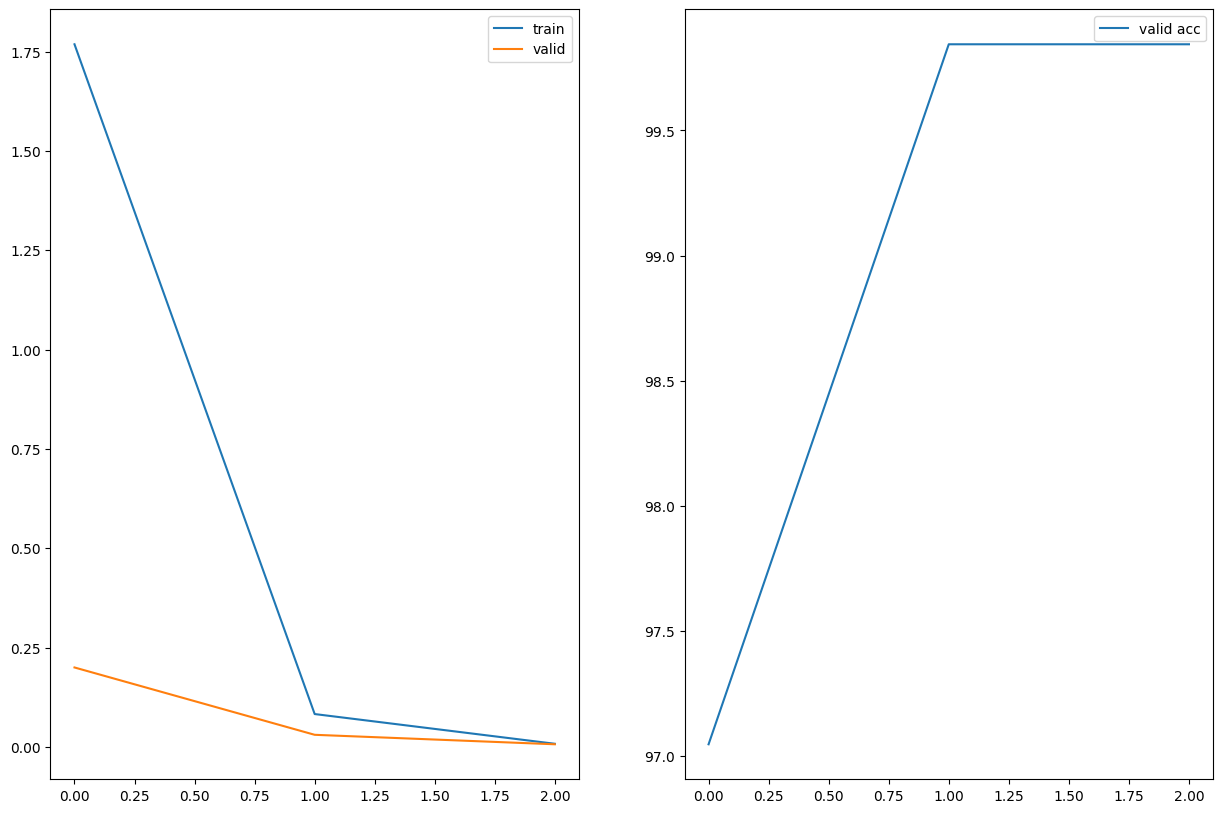

In [133]:
# Plot train and validation Loss:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
ax1.plot(mean_train_losses, label='train')
ax1.plot(mean_valid_losses, label='valid')
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='best')

ax2.plot(valid_acc_list, label='valid acc')
ax2.legend()

In [134]:
# Poet predictor based on the Neural Network:

def neural_predictor(poem):

    outputs = model(torch.from_numpy(vectorizer.transform([poem]).toarray()).to(dtype=model.layers[0].weight.dtype))
    pred = outputs.max(1, keepdim=True)[1]

    return list(set(authors))[int(pred[0][0])]

In [135]:
neural_predictor("""
Imbolygó hegyek jönnek,
sörényük meg-megrázzák,
minden ablakba tesznek
egy-egy remegő nyárfát.

Valaki, mint egy kalapot,
megemelint egy dombot,
s látom, amint a hold alól
kiugranak a tornyok."""
)

'Pilinszky János'

#### Confusion Matrix and Metrics:

In [136]:
authors_pred=[neural_predictor(poem) for poem in texts]

In [137]:
author_set = list(set(authors))
metrics_dict_neural = {}
conf_mx_neural = metrics.confusion_matrix(y_true=authors, y_pred=authors_pred, labels=author_set)
metrics_dict_neural["avg precision"] = metrics.precision_score(
    y_true=authors, y_pred=authors_pred, zero_division=0, average='macro'
    )
metrics_dict_neural["avg recall"] = metrics.recall_score(
    y_true=authors, y_pred=authors_pred, zero_division=0, average='macro'
    )

In [138]:
# Precision, Recall

metrics_dict_neural

{'avg precision': 0.9999006458022851, 'avg recall': 0.9996632996632997}

/tmp/ipykernel_689934/471645957.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(author_set)
/tmp/ipykernel_689934/471645957.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(author_set)


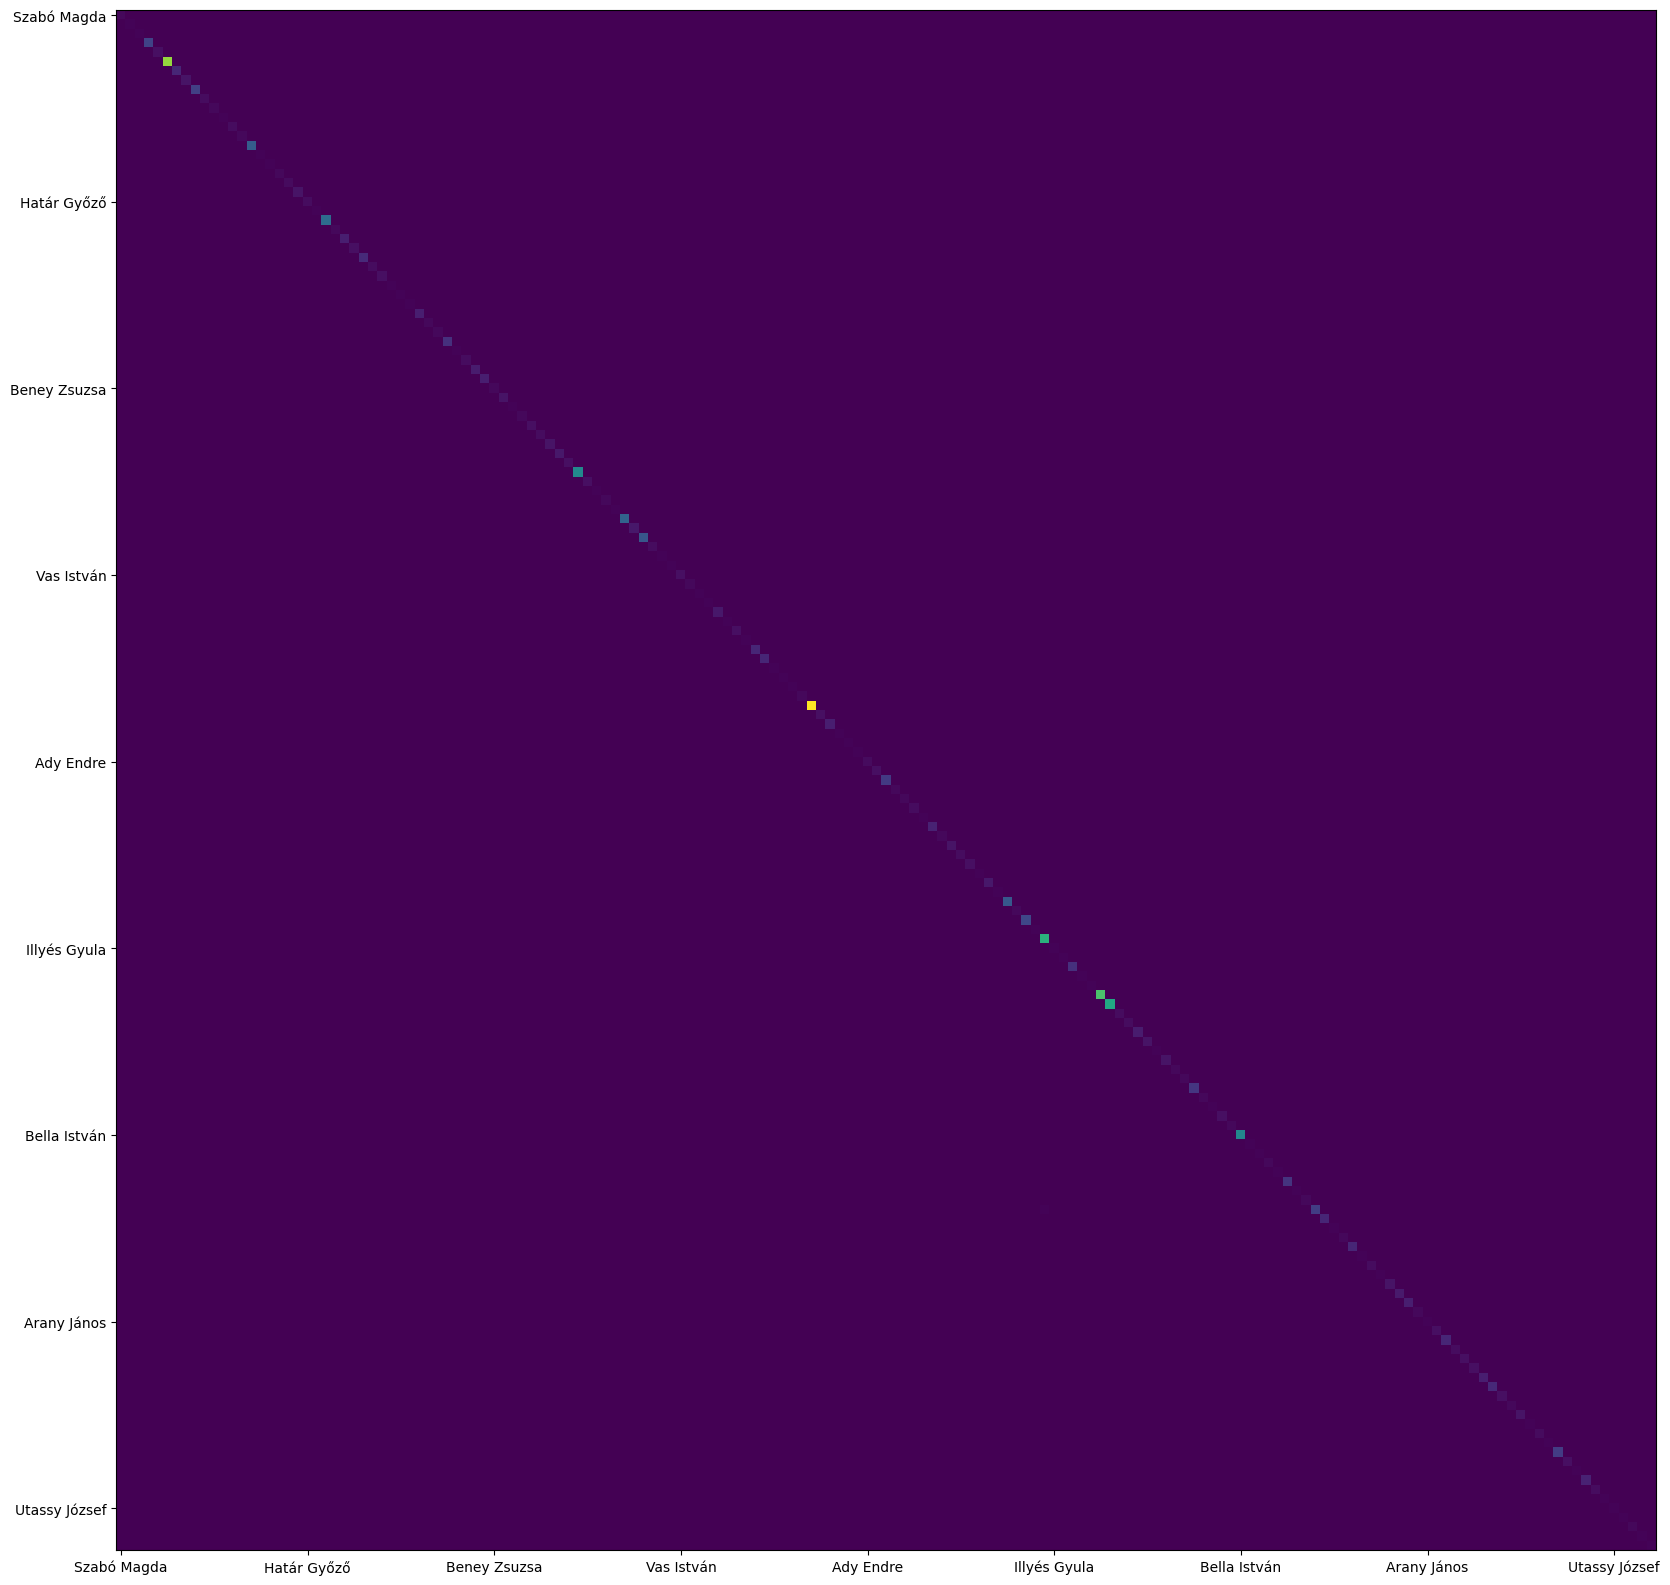

In [139]:
# Confusion Matrix

fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
ax.set_yticklabels(author_set)
ax.set_xticklabels(author_set)
ax.imshow(conf_mx_neural)

## Interpretation:

* We were able to Scrape a relatively big, rich and clean corpus of Poems (which contain low resource languages e.g. Hungarian, and their translations for example to English)
* Based on only 2500 Poems (20 % of the corpus) we could train a relatively accurate Poem Classifier:
    * Accuracy ~ 90 %
    * Mean Precision ~ 97 %
    * Mean Recall ~ 90 %
* The results are supricingly robust
    * they use Beg of words Embedding

## Questions II:

* How semantic analysis could help on the performance?
* How different embeddings could increase the performance?
* How could we optimize Neural Networks?

# References and Resources:

* Classification:
    * https://www.wolfram.com/language/introduction-machine-learning/classification/
* Scraping example in Wolfram Language:
    * https://www.wolfram.com/broadcast/video.php?c=105&p=8&v=3081
* Transformer Neural Nets
    * https://www.wolfram.com/language/12/neural-network-framework/use-transformer-neural-nets.html
    * https://resources.wolframcloud.com/NeuralNetRepository/resources/BERT-Trained-on-BookCorpus-and-Wikipedia-Data/
* Lyukasóra (Hungarian):
    * https://nava.hu/talalati-lista/?q=lyukas%C3%B3ra
* Natural Language Processing
    * https://www.youtube.com/watch?v=otH29Uoo-HE
    * https://www.cl.cam.ac.uk/teaching/1920/NLP/materials.html
    * https://www.cl.cam.ac.uk/teaching/2122/MLRD/materials.html
    * https://www.youtube.com/playlist?list=PLoROMvodv4rOFZnDyrlW3-nI7tMLtmiJZ
    * https://web.stanford.edu/class/cs224n/